In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
display(df)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [6]:
df.shape

(253680, 22)

In [7]:
df.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [8]:
# Initial Duplicates Checking
print("Uniqueness Percentage:", len(df.drop_duplicates()) / len(df))
if len(df.drop_duplicates()) / len(df) != 1:
    df = df.drop_duplicates()
display(df)

Uniqueness Percentage: 0.9057907600126143


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


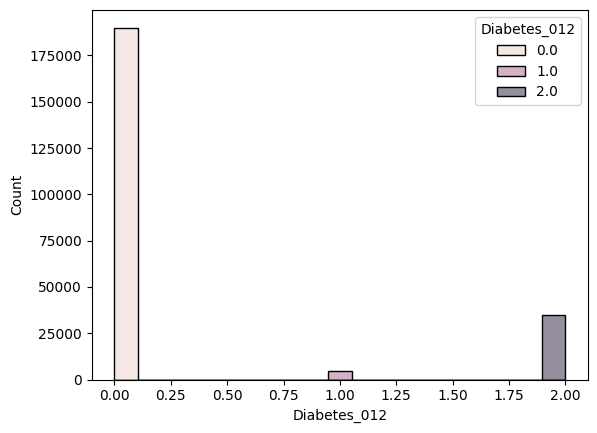

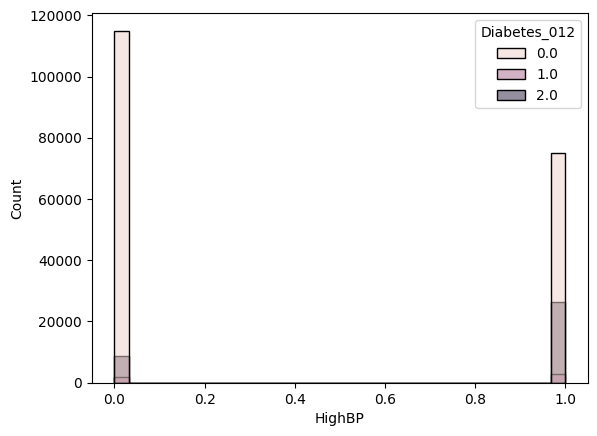

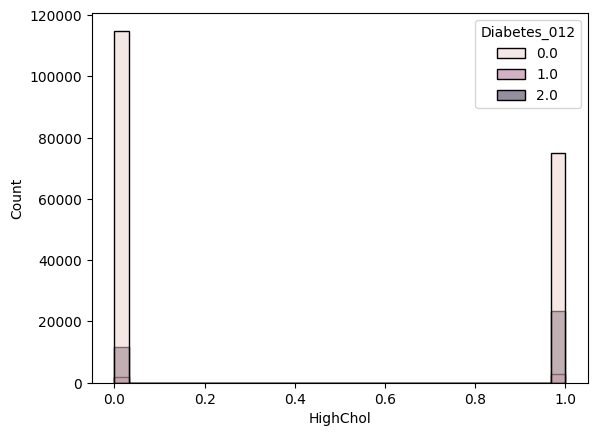

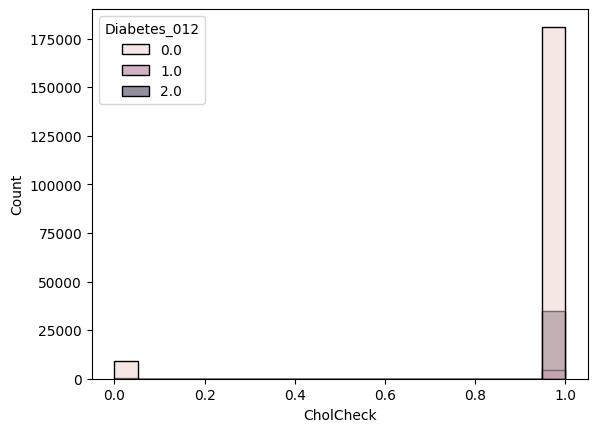

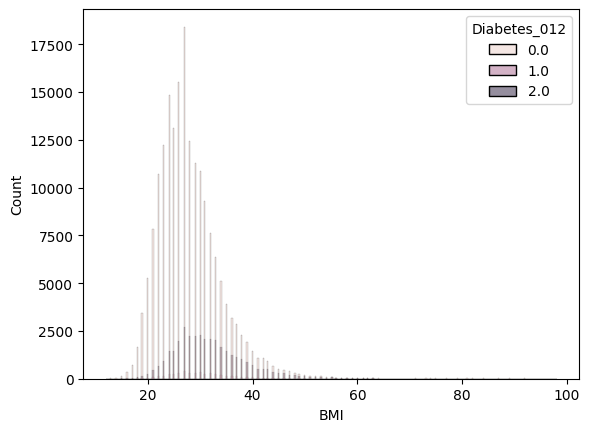

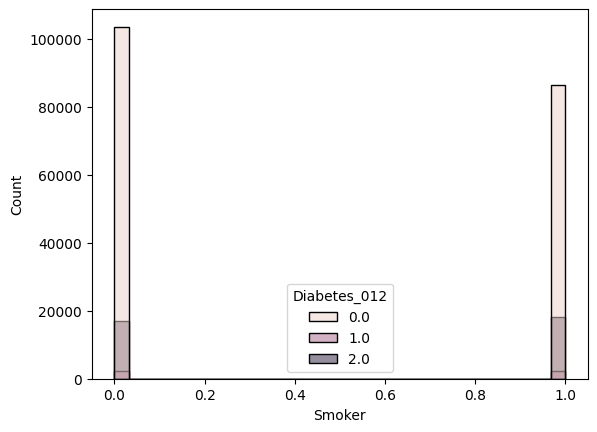

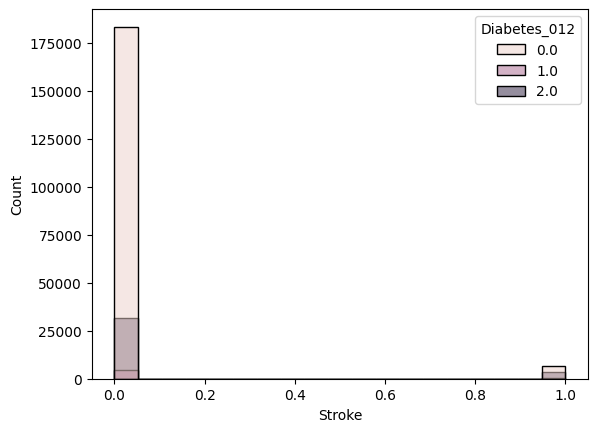

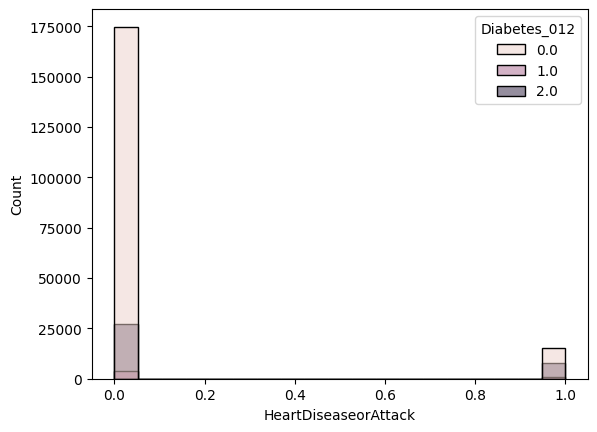

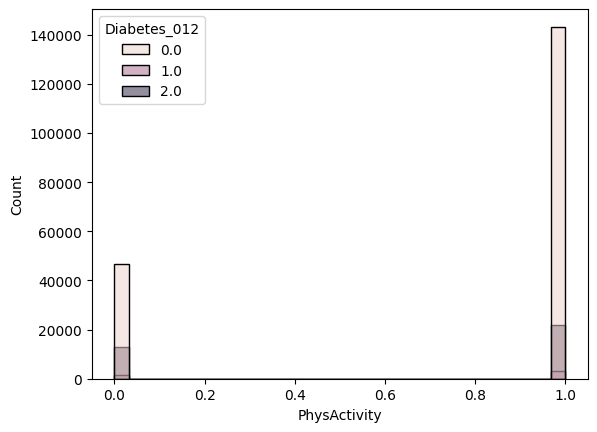

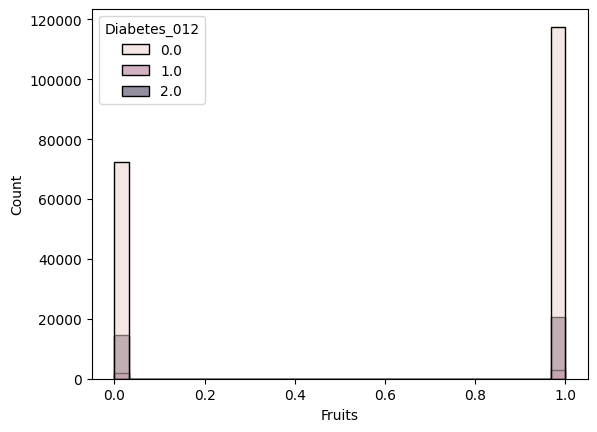

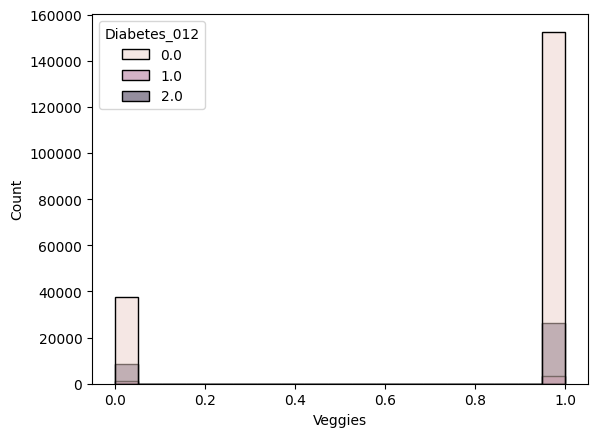

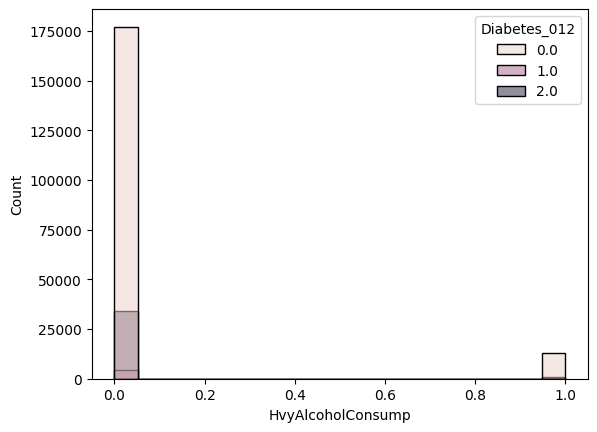

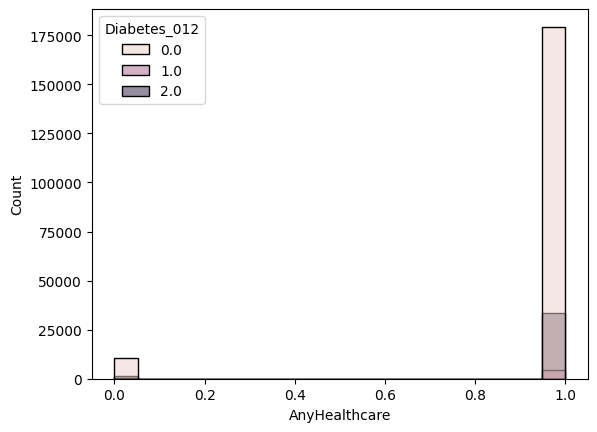

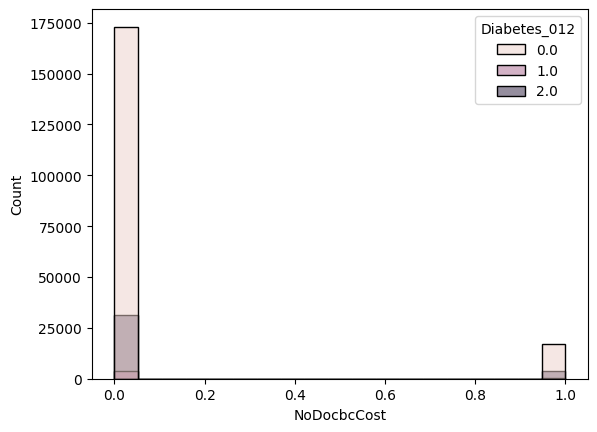

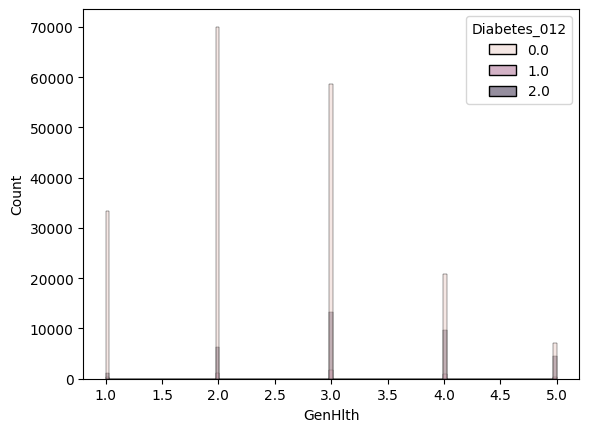

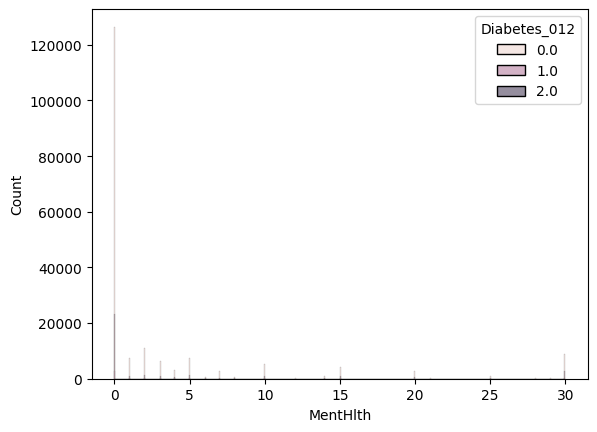

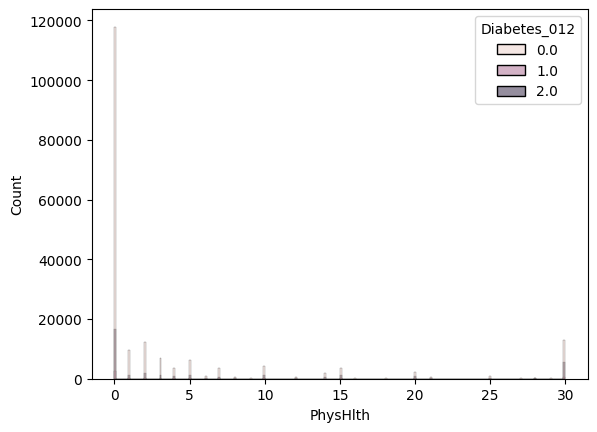

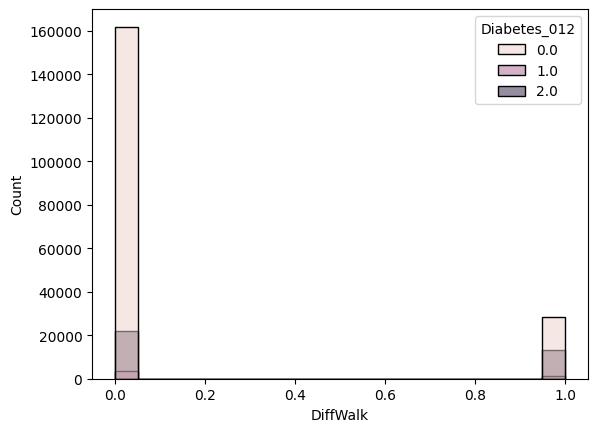

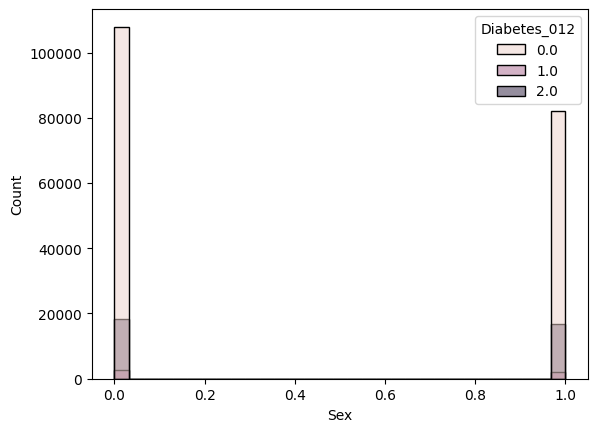

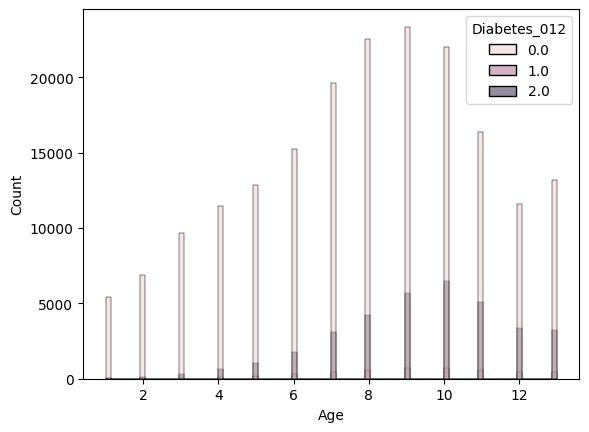

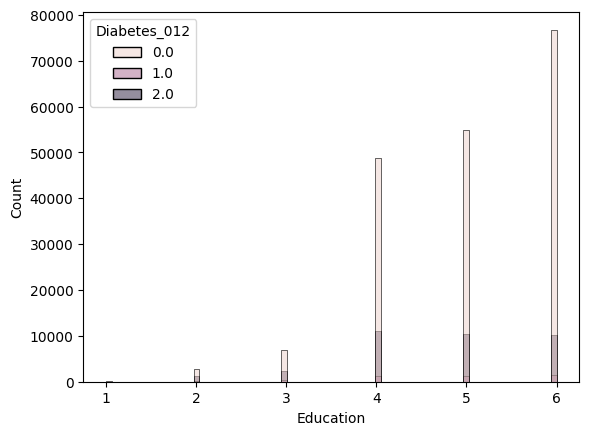

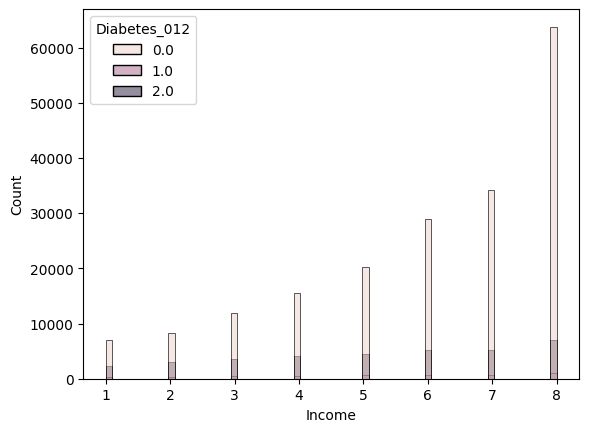

In [9]:
# Detailed Histogram Plot
for column in df.columns:
    sns.histplot(data=df, x=column, hue="Diabetes_012")
    #sns.histplot(data=df, x=column, hue="Diabetes_binary")
    plt.show()

In [10]:
# Drop Column based on Spread Distribution
df = df.drop(columns=["CholCheck",
                      "Stroke",
                      "HeartDiseaseorAttack",
                      "HvyAlcoholConsump",
                      "AnyHealthcare",
                      "NoDocbcCost"])
display(df)

,Diabetes_012,HighBP,HighChol,BMI,Smoker,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,1.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,1.0,1.0,1.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,45.0,0.0,0.0,1.0,1.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,28.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,23.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [11]:
# Value Counts of Each Columns
for column in df.columns:
    print(f"========== {column} ==========")
    display(df[column].value_counts())
    print()

========== Diabetes_012 ==========


Diabetes_012
0.0    190055
2.0     35097
1.0      4629
Name: count, dtype: int64


========== HighBP ==========


HighBP
0.0    125359
1.0    104422
Name: count, dtype: int64


========== HighChol ==========


HighChol
0.0    128273
1.0    101508
Name: count, dtype: int64


========== BMI ==========


BMI
27.0    21551
26.0    17808
24.0    16537
28.0    14933
25.0    14809
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: count, Length: 84, dtype: int64


========== Smoker ==========


Smoker
0.0    122781
1.0    107000
Name: count, dtype: int64


========== PhysActivity ==========


PhysActivity
1.0    168511
0.0     61270
Name: count, dtype: int64


========== Fruits ==========


Fruits
1.0    140848
0.0     88933
Name: count, dtype: int64


========== Veggies ==========


Veggies
1.0    182633
0.0     47148
Name: count, dtype: int64


========== GenHlth ==========


GenHlth
2.0    77536
3.0    73714
1.0    34907
4.0    31546
5.0    12078
Name: count, dtype: int64


========== MentHlth ==========


MentHlth
0.0     152623
2.0      12697
30.0     12080
5.0       8913
1.0       8309
3.0       7302
10.0      6352
15.0      5501
4.0       3774
20.0      3362
7.0       3090
25.0      1188
14.0      1167
6.0        988
8.0        639
12.0       398
28.0       327
21.0       227
29.0       158
18.0        97
9.0         91
16.0        88
27.0        79
22.0        63
17.0        54
26.0        45
11.0        41
13.0        41
23.0        38
24.0        33
19.0        16
Name: count, dtype: int64


========== PhysHlth ==========


PhysHlth
0.0     136877
30.0     19386
2.0      14495
1.0      11074
3.0       8435
5.0       7597
10.0      5588
15.0      4914
7.0       4531
4.0       4521
20.0      3273
14.0      2584
25.0      1336
6.0       1328
8.0        809
21.0       663
12.0       578
28.0       522
29.0       215
9.0        179
18.0       152
16.0       112
27.0        99
17.0        96
24.0        72
22.0        70
26.0        69
13.0        68
11.0        60
23.0        56
19.0        22
Name: count, dtype: int64


========== DiffWalk ==========


DiffWalk
0.0    187155
1.0     42626
Name: count, dtype: int64


========== Sex ==========


Sex
0.0    128854
1.0    100927
Name: count, dtype: int64


========== Age ==========


Age
9.0     29736
10.0    29168
8.0     27301
7.0     23140
11.0    22041
6.0     17299
13.0    16813
12.0    15394
5.0     14050
4.0     12234
3.0     10025
2.0      7068
1.0      5512
Name: count, dtype: int64


========== Education ==========


Education
6.0    88443
5.0    66499
4.0    61158
3.0     9467
2.0     4040
1.0      174
Name: count, dtype: int64


========== Income ==========


Income
8.0    71818
7.0    40189
6.0    35001
5.0    25345
4.0    19957
3.0    15922
2.0    11757
1.0     9792
Name: count, dtype: int64

In [12]:
# Final Duplicates Checking
print("Uniqueness Percentage:", len(df.drop_duplicates()) / len(df))
if len(df.drop_duplicates()) / len(df) != 1:
    df = df.drop_duplicates()
display(df)

Uniqueness Percentage: 0.9718035868936074


,Diabetes_012,HighBP,HighChol,BMI,Smoker,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,1.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,1.0,1.0,1.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,45.0,0.0,0.0,1.0,1.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,28.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,23.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


**Explanatory Data Analysis**

In [13]:
# Correlation Matrix v1
df_corr = np.round(df.corr(),5)
df_corr

,Diabetes_012,HighBP,HighChol,BMI,Smoker,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,1.00000,0.26036,0.20251,0.20870,0.04551,-0.09858,-0.02188,-0.03945,0.28069,0.05335,0.15614,0.20705,0.03302,0.18551,-0.10292,-0.14149
HighBP,0.26036,1.00000,0.27857,0.19021,0.07100,-0.10019,-0.01645,-0.03947,0.26635,0.03363,0.14135,0.20978,0.04540,0.33709,-0.10829,-0.13420
HighChol,0.20251,0.27857,1.00000,0.08571,0.07159,-0.06084,-0.02445,-0.02527,0.18353,0.04835,0.10913,0.13472,0.01962,0.25957,-0.04723,-0.05823
BMI,0.20870,0.19021,0.08571,1.00000,-0.01213,-0.12246,-0.06288,-0.03946,0.20071,0.06416,0.09764,0.17856,0.02835,-0.05193,-0.06779,-0.06183
Smoker,0.04551,0.07100,0.07159,-0.01213,1.00000,-0.06581,-0.06108,-0.01284,0.13305,0.07731,0.10017,0.10810,0.09669,0.10464,-0.13417,-0.09435
PhysActivity,-0.09858,-0.10019,-0.06084,-0.12246,-0.06581,1.00000,0.12133,0.13059,-0.23083,-0.10063,-0.19392,-0.23108,0.03290,-0.08793,0.16449,0.15818
Fruits,-0.02188,-0.01645,-0.02445,-0.06288,-0.06108,0.12133,1.00000,0.24045,-0.06525,-0.04897,-0.02013,-0.02604,-0.08844,0.07411,0.08045,0.04623
Veggies,-0.03945,-0.03947,-0.02527,-0.03946,-0.01284,0.13059,0.24045,1.00000,-0.08764,-0.03800,-0.04006,-0.05868,-0.06724,-0.00316,0.12703,0.11937
GenHlth,0.28069,0.26635,0.18353,0.20071,0.13305,-0.23083,-0.06525,-0.08764,1.00000,0.27977,0.51488,0.44434,-0.01124,0.14385,-0.23716,-0.32400
MentHlth,0.05335,0.03363,0.04835,0.06416,0.07731,-0.10063,-0.04897,-0.03800,0.27977,1.00000,0.33636,0.21445,-0.08355,-0.10561,-0.07053,-0.18012


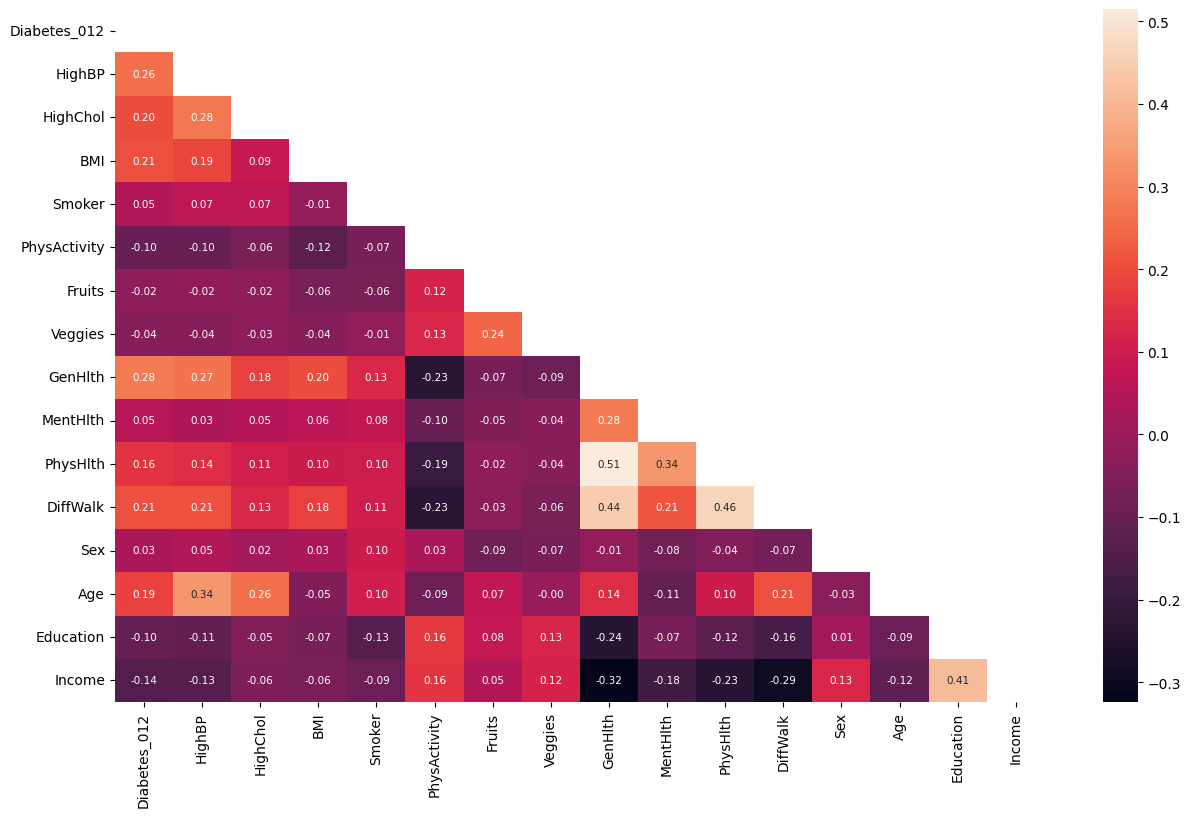

In [14]:
# Correlation Matrix v2
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 9))
ax = sns.heatmap(df_corr, mask=mask, annot=True, annot_kws={'size':7.5}, fmt=".2f")

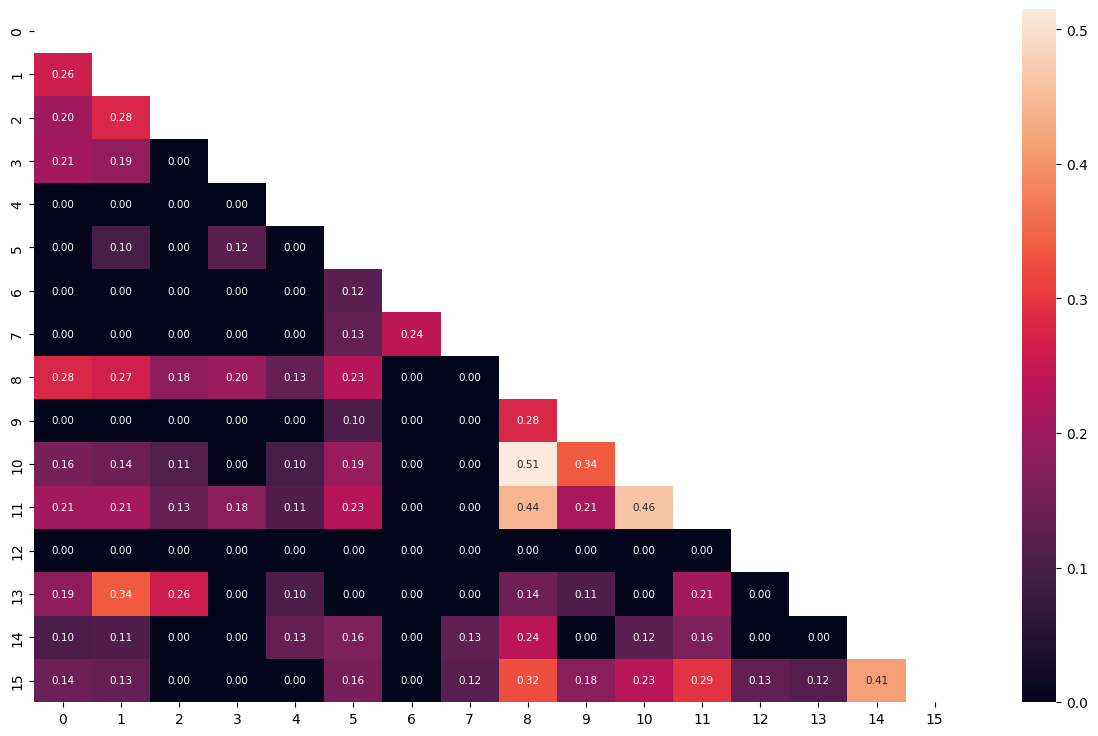

In [15]:
# Correlation Matrix v3
df_corr_modified = abs(np.array(df_corr))
for i in range(len(df_corr_modified)):
    for j in range(len(df_corr_modified)):
        if df_corr_modified[i][j] <= 0.1:
            df_corr_modified[i][j] = 0

mask = np.zeros_like(df_corr_modified)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 9))
ax = sns.heatmap(df_corr_modified, mask=mask, annot=True, annot_kws={'size':7.5}, fmt=".2f")

In [16]:
# Drop Column based on Spread Distribution
df = df.drop(columns=["Smoker",
                      "PhysActivity",
                      "Fruits",
                      "Veggies",
                      "MentHlth",
                      "Sex"])
display(df)

,Diabetes_012,HighBP,HighChol,BMI,GenHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0.0,1.0,1.0,40.0,5.0,15.0,1.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,3.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,5.0,30.0,1.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,2.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,2.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,45.0,3.0,5.0,0.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,18.0,4.0,0.0,1.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,28.0,1.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,23.0,3.0,0.0,0.0,7.0,5.0,1.0


In [17]:
# Verify that the target variable still has 3 classes
print("Unique classes in target variable:", df['Diabetes_012'].unique())

Unique classes in target variable: [0. 2. 1.]


In [18]:
from imblearn.over_sampling import SMOTE
# Split the data into features and target
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y_encoded)

# One-hot encode the resampled target variable
y_res_one_hot = to_categorical(y_res, num_classes=3)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res_one_hot, test_size=0.2, random_state=42)

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Define the model
model = Sequential([
    Dense(60, activation='relu', input_dim=X_train.shape[1]),
    Dense(30, activation='relu'),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='nadam', loss='mse', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                600       
                                                                 
 dense_1 (Dense)             (None, 30)                1830      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 3)                 33        
                                                                 
Total params: 2773 (10.83 KB)
Trainable params: 2773 (10.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# Define callbacks for early stopping and reduce learning rate on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train the model
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2, batch_size=100, verbose=1,
                    callbacks=[early_stopping, reduce_lr], shuffle=True)

Epoch 1/500
3528/3528 [==============================] - 10s 2ms/step - loss: 0.1787 - accuracy: 0.5691 - val_loss: 0.1704 - val_accuracy: 0.5963 - lr: 0.0010
Epoch 2/500
3528/3528 [==============================] - 9s 3ms/step - loss: 0.1699 - accuracy: 0.5963 - val_loss: 0.1679 - val_accuracy: 0.6048 - lr: 0.0010
Epoch 3/500
3528/3528 [==============================] - 10s 3ms/step - loss: 0.1682 - accuracy: 0.6014 - val_loss: 0.1684 - val_accuracy: 0.6038 - lr: 0.0010
Epoch 4/500
3528/3528 [==============================] - 8s 2ms/step - loss: 0.1673 - accuracy: 0.6041 - val_loss: 0.1675 - val_accuracy: 0.6035 - lr: 0.0010
Epoch 5/500
3528/3528 [==============================] - 9s 3ms/step - loss: 0.1666 - accuracy: 0.6058 - val_loss: 0.1662 - val_accuracy: 0.6048 - lr: 0.0010
Epoch 6/500
3528/3528 [==============================] - 10s 3ms/step - loss: 0.1660 - accuracy: 0.6071 - val_loss: 0.1650 - val_accuracy: 0.6119 - lr: 0.0010
Epoch 7/500
3528/3528 [==========================

In [21]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6632952094078064


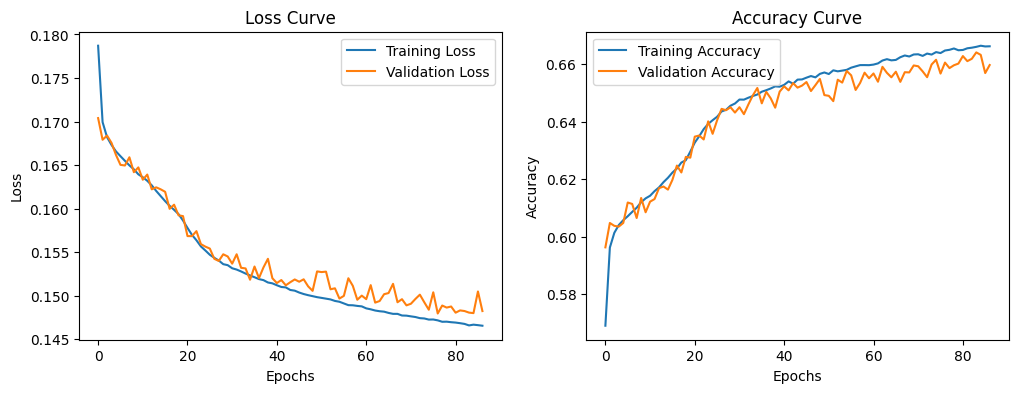

In [22]:
# Plot loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

3445/3445 [==============================] - 4s 1ms/step
Unique classes in y_true: [0 1 2]


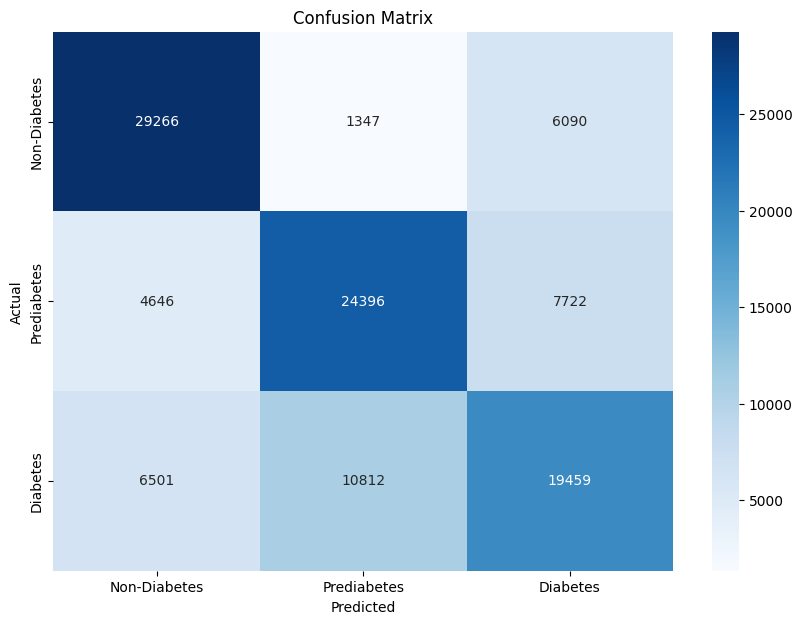

Classification Report:
              precision    recall  f1-score   support

Non-Diabetes       0.72      0.80      0.76     36703
 Prediabetes       0.67      0.66      0.67     36764
    Diabetes       0.58      0.53      0.56     36772

    accuracy                           0.66    110239
   macro avg       0.66      0.66      0.66    110239
weighted avg       0.66      0.66      0.66    110239



In [23]:
# Confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Verify the unique classes in y_true
print("Unique classes in y_true:", np.unique(y_true))

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetes', 'Prediabetes', 'Diabetes'], yticklabels=['Non-Diabetes', 'Prediabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Adjust target_names based on unique classes in y_true
unique_classes = np.unique(y_true)
target_names = ['Non-Diabetes', 'Prediabetes', 'Diabetes']
adjusted_target_names = [target_names[i] for i in unique_classes]

# Print classification report
class_report = classification_report(y_true, y_pred_classes, target_names=adjusted_target_names)
print('Classification Report:')
print(class_report)

In [27]:
# Confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

3445/3445 [==============================] - 10s 3ms/step
Confusion Matrix:
[[29266  1347  6090]
 [ 4646 24396  7722]
 [ 6501 10812 19459]]


AUC for class 0 is 0.91604
AUC for class 1 is 0.83544
AUC for class 2 is 0.76376
Combined AUC for all classes (macro): 0.83842


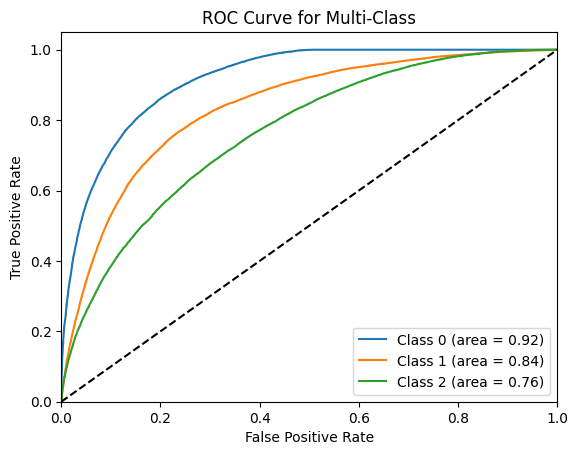

In [26]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
# Calculate and plot ROC AUC for each class
y_test_bin = label_binarize(y_true, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Calculate ROC AUC for each class
roc_auc = {}
for i in range(n_classes):
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred[:, i])
    print("AUC for class {} is {}".format(i, np.round(roc_auc[i], 5)))

# Calculate combined ROC AUC using 'macro' averaging
combined_roc_auc = roc_auc_score(y_test_bin, y_pred, average="macro")
print("Combined AUC for all classes (macro):", np.round(combined_roc_auc, 5))

# Plot ROC Curve for each class
plt.figure()
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    plt.plot(fpr, tpr, label='Class {} (area = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class')
plt.legend(loc="lower right")
plt.show()